curvePointsX=[0.0, 0.0035671819262782407, 0.01426872770511296, 0.03210463733650416, 0.05707491082045184, 0.08917954815695602, 0.12841854934601665, 0.17479191438763372, 0.22829964328180735, 0.2889417360285375, 0.3567181926278241, 0.43162901307966695, 0.5136741973840666, 0.6028537455410226, 0.6991676575505349, 0.8026159334126042, 0.9131985731272294, 1.0309155766944111, 1.1557669441141503, 1.2877526753864448, 1.4268727705112965, 1.5731272294887042, 1.7265160523186678, 1.887039239001189, 2.0546967895362664, 2.2294887039239, 2.4114149821640902, 2.600475624256837, 2.7966706302021396, 3.0]
curvePointsY=[0.0, 0.10332526958874902, 0.20591250153757842, 0.3070236582065685, 0.40592070195579966, 0.5018655951453524, 0.5941203001353069, 0.6819467792857434, 0.7646069949567428, 0.841362909508385, 0.9114764853007503, 0.9742096846939194, 1.0288244700479725, 1.0745828037229899, 1.110746648079052, 1.1365779654762391, 1.151338718274632, 1.1542908688343105, 1.1446963795153553, 1.1218172126778465, 1.084915330

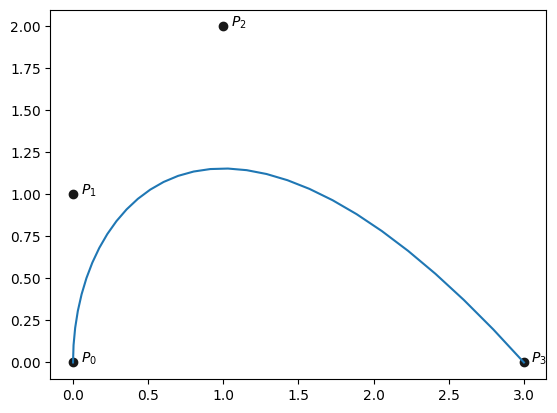

In [71]:
class Point:
    def __init__(self, x, y) -> None:
        self.x = x
        self.y = y
    
    def __add__(self, other):
        return Point(self.x+other.x, self.y+other.y)
    
    def __str__(self):
        return f"{{x:{self.x}, y: {self.y}}}"

    def __mul__(self, other: float):
        return Point(self.x*other, self.y*other)
    
    def __rmul__(self, other: float):
        return self*other
    
def Bernstein(i, n, u):
    temp = [0.0 for j in range(0, n+1)]
    temp[n-i] = 1.0
    u1 = 1.0-u
    for k in range(1, n+1):
        for j in range(n, k-1, -1):
            temp[j] = u1*temp[j]+u*temp[j-1]
    return temp[n]

def allBernstein(n, u):
    B = [0.0 for j in range(0, n+1)]
    B[0] = 1.0
    u1 = 1.0 - u
    for j in range(1, n+1):
        saved = 0.0
        for k in range(0, j):
            temp = B[k]
            B[k] = saved + u1*temp
            saved = u*temp
        B[j] = saved
    return B


def pointOnBezierCurve(P, n, u):
    B = allBernstein(n, u)
    C = Point(0.0,0.0)
    for k in range(0, n+1):
        C += C + B[k]*P[k]
    return C

import copy

def deCasteljau1(P,n,u):
    Q = copy.deepcopy(P)
    for k in range(1, n+1):
        for i in  range(0, n-k+1):
            Q[i] = (1.0-u)*Q[i]+u*Q[i+1]
    return Q[0]

P = [
    Point(0,0),
    Point(0,1),
    Point(1,2),
    Point(3,0)
]

import numpy as np

pointsNumber = 30
curvePointsX = []
curvePointsY = []

grid = np.linspace(0, 1, pointsNumber)

for u in grid:
    C = deCasteljau1(P, len(P)-1, u)
    curvePointsX.append(C.x)
    curvePointsY.append(C.y)

print(f"{curvePointsX=}")
print(f"{curvePointsY=}")

pointsX = list(map(lambda e: e.x, P))
pointsY = list(map(lambda e: e.y, P))

print(f"{pointsX=}")
print(f"{pointsY=}")


import matplotlib.pyplot as plt

plt.plot(curvePointsX, curvePointsY)
plt.scatter(pointsX, pointsY, color="#181818")
for i in range(len(pointsX)):
    plt.annotate(f"$P_{i}$", (pointsX[i]+0.05, pointsY[i]))


In [102]:
class Point3:
    def __init__(self, x, y, z) -> None:
        self.x = x
        self.y = y
        self.z = z
    
    def __add__(self, other):
        return Point3(self.x+other.x, self.y+other.y, self.z+other.z)
    
    def __str__(self):
        return f"{{x:{self.x}, y: {self.y}, z: {self.z}}}"

    def __mul__(self, other: float):
        return Point3(self.x*other, self.y*other, self.z*other)
    
    def __rmul__(self, other: float):
        return self*other
    
def deCasteljau2(P, n, m, u0, v0):
    Q = []
    if(n <= m):
        for j in range(0, m+1):
            Q.append(deCasteljau1(P[j], n, u0))
        return deCasteljau1(Q, m, v0)
    else:
        for i in range(0, n+1):
            Q.append(deCasteljau1(P[:, i], m, v0))
        return deCasteljau1(Q, n, u0)


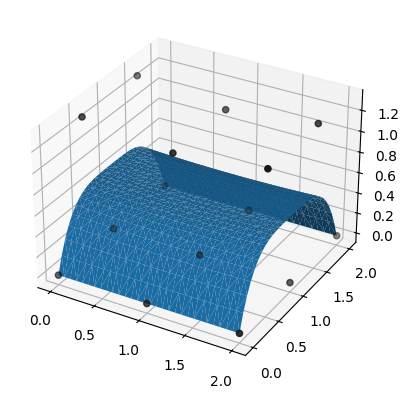

In [109]:
P = np.array(
    [[Point3(0,0,0),Point3(1,0,0),Point3(2,0,0)],
     [Point3(0,0.5,1.3),Point3(1,0.5,1.2),Point3(2,0.5,1.3)],
     [Point3(0,1,0),Point3(1,1,0),Point3(2,1,0)],
     [Point3(0,1.5,1.3),Point3(1,1.5,1.2),Point3(2,1.5,1.3)],
     [Point3(0,2,0),Point3(1,2,0),Point3(2,2,0)]])

pointsX = list(map(lambda e: e.x, P.flat))
pointsY = list(map(lambda e: e.y, P.flat))
pointsZ = list(map(lambda e: e.z, P.flat))


surfaceX = []
surfaceY = []
surfaceZ = []

gridX = np.linspace(0, 1, pointsNumber)
gridY = np.linspace(0, 1, pointsNumber)

for u in gridX:
    for v in gridY:
        S = deCasteljau2(P, len(P[0])-1, len(P)-1, u, v)
        surfaceX.append(S.x)
        surfaceY.append(S.y)
        surfaceZ.append(S.z)

surfaceX = np.array(surfaceX)
surfaceY = np.array(surfaceY)
surfaceZ = np.array(surfaceZ)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(pointsX, pointsY, pointsZ, color="#181818")
ax.plot_trisurf(surfaceX, surfaceY, surfaceZ)
